In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
np.random.seed(42)

# Generate data
m = 200
X = np.random.uniform(0, 5, m)
epsilon = np.random.normal(0, 1, m)
y = 3 + 4 * X + epsilon

# Add bias term (column of ones)
X_b = np.c_[np.ones(m), X]

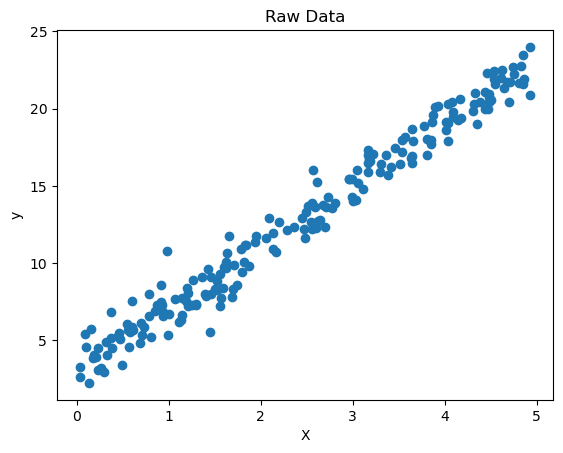

In [3]:
plt.figure()
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Raw Data")
plt.show()


In [4]:
# Normal Equation
theta_closed = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

intercept_closed = theta_closed[0]
slope_closed = theta_closed[1]

print("Closed-form Solution:")
print("Intercept:", intercept_closed)
print("Slope:", slope_closed)


Closed-form Solution:
Intercept: 3.1052011509608213
Slope: 3.9843857863650065


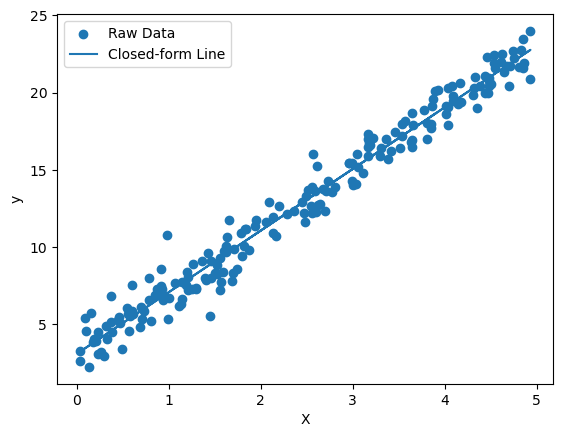

In [5]:
 y_pred_closed = X_b @ theta_closed

plt.figure()
plt.scatter(X, y, label="Raw Data")
plt.plot(X, y_pred_closed, label="Closed-form Line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


In [6]:
# Initialize parameters
theta = np.zeros(2)
learning_rate = 0.05
iterations = 1000

losses = []

for i in range(iterations):
    y_pred = X_b @ theta
    error = y_pred - y
    gradient = (2/m) * X_b.T @ error
    theta = theta - learning_rate * gradient
    
    mse = np.mean(error ** 2)
    losses.append(mse)

intercept_gd = theta[0]
slope_gd = theta[1]

print("Gradient Descent Solution:")
print("Intercept:", intercept_gd)
print("Slope:", slope_gd)


Gradient Descent Solution:
Intercept: 3.1052011509363893
Slope: 3.9843857863726124


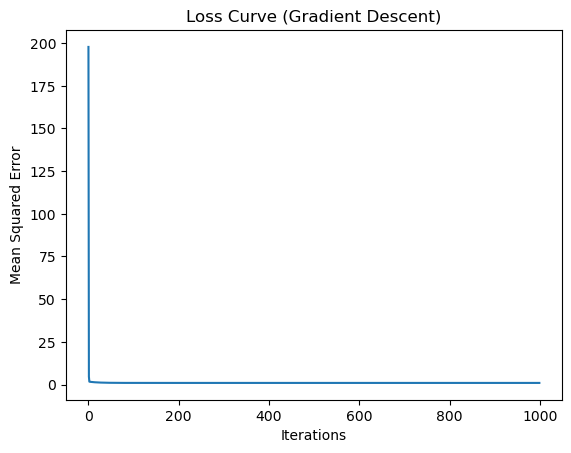

In [7]:
plt.figure()
plt.plot(range(iterations), losses)
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.title("Loss Curve (Gradient Descent)")
plt.show()


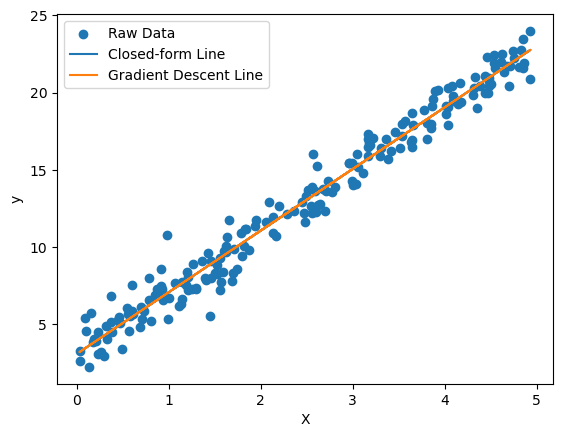

In [8]:
y_pred_gd = X_b @ theta

plt.figure()
plt.scatter(X, y, label="Raw Data")
plt.plot(X, y_pred_closed, label="Closed-form Line")
plt.plot(X, y_pred_gd, label="Gradient Descent Line")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()


In [9]:
print("Comparison of Solutions")
print("Closed-form Intercept:", intercept_closed)
print("Closed-form Slope:", slope_closed)
print("Gradient Descent Intercept:", intercept_gd)
print("Gradient Descent Slope:", slope_gd)


Comparison of Solutions
Closed-form Intercept: 3.1052011509608213
Closed-form Slope: 3.9843857863650065
Gradient Descent Intercept: 3.1052011509363893
Gradient Descent Slope: 3.9843857863726124
